# 1. Introdução

Até o momento, salvo poucas exceções, lidamos apenas com definições relacionadas a funções contínuas. Para trabalhar com dados no computador, entretanto, é necessário que o sinal contínuo passe por **discretização**, ou seja, obtenção de amostras com espaçamento adequado no tempo ou no espaço, de forma a representar o sinal contínuo original. Em Geofísica, na prática trabalhamos apenas com sinal discreto.

Para facilitar o entendimento de algumas propriedades básicas do sinal discreto, vamos utilizar sinais básicos que representam **ondas**. Há muitos exemplos de ondas que podemos citar, como ondas sonoras, ondas em uma corda, ondas de terremotos, microondas, etc, mas podemos definir uma onda como uma perturbação que viaja através do espaço transferindo energia de um lugar para outro.

# 2. Características do sinal discreto

In [2]:
# importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt

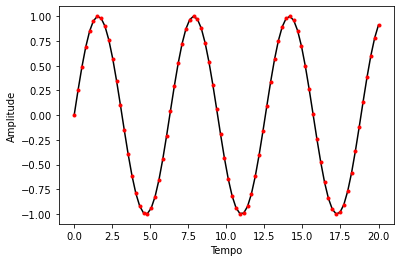

In [21]:
# vamos criar um vetor de tempo de 20 s com 80 amostras
t = np.linspace(0, 20, 80)

# agora, vamos pegar uma função seno, que é contínua, e discretizá-la
# nos pontos correspondentes ao nosso vetor de tempos
y = np.sin(t)

# plotando
plt.plot(t, y, color="black")
plt.plot(t, y, '.', color="red")
plt.ylabel("Amplitude")
plt.xlabel("Tempo");

Os pontos vermelhos representam a discretização no tempo do sinal contínuo que fizemos, isto é, somente nesses pontos nós amostramos o valor da onda.

Algumas características importantes de ondas são amplitude, período, comprimento de onda e frequência:

- Amplitude: descreve a diferença entre o pico máximo da função e o valor de base. No exemplo anterior, o valor da amplitude é igual a 1 (pico em 1 e valor de base igual a zero);
- Período: é o tempo necessário para que o sinal se repita. Uma função seno é periódica, mas repare que há diversos sinais aperiódicos;
- Comprimento de onda: é a distância entre dois vales ou dois picos de uma onda (domínio do espaço);
- Frequência: pode ser descrita como o número de ciclos em um segundo, ou seja, quantas vezes a onda passa por um ponto fixo em um segundo. A unidade da frequência é ciclos/segundo ou Hertz (Hz), e a relação entre período (T) e frequência (f) é dada por: T = 1/f.

Quando trabalhamos com sinal discreto, precisamos específicar o quanto a onda será amostrada no tempo, ou seja, a sua **taxa de amostragem**, com unidade Hz. No exemplo anterior, a cada segundo é representado por quatro amostras, ou seja, a taxa de amostragem é de 4 Hz. Com essas definições em mente, vamos representar uma onda seno da seguinte forma:

$\large y(t) = Asin(\omega t + \phi)$

onde A é a amplitude da onda, $\omega$ é a **frequência angular**, que especifica quantos ciclos ocorrem em um segundo, em radianos por segundo e $\phi$ é a fase do sinal. A relação entre período, frequência e frequência angular é dada por:

$\large \omega = \frac{2\pi}{T} = 2\pi f$

**Exemplo.** Gere duas ondas seno entre 0 e 1 segundos, com frequências de 5 Hz e 10 Hz, respectivamente, ambas com taxa de amostragem de 100 Hz. Plote os resultados.

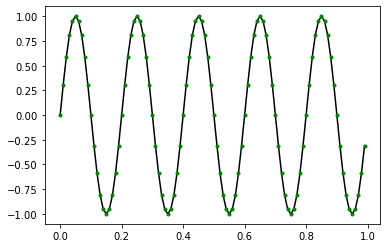

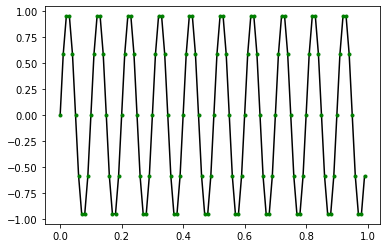

In [37]:
# taxa de amostragem
sr = 100.0
# intervalo de amostragem
ts = 1.0/sr
# vetor de tempos
t = np.arange(0, 1, ts)

# onda seno com f = 5 Hz
freq = 5.0
y = np.sin(2*np.pi*freq*t)

plt.figure()
plt.plot(t, y, color="black")
plt.plot(t, y, '.', color="green")


# onda seno com f = 10 Hz

freq = 10.0
y = np.sin(2*np.pi*freq*t)

plt.figure()
plt.plot(t, y, color="black")
plt.plot(t, y, '.', color="green")

**Exercício.** Agora, para analisar o efeito da fase e da amplitude, gere duas ondas seno entre 0 e 1 segundos com frequência de 5 Hz e taxa de amostragem, mas iguale a fase a zero e a amplitude a 5 em um caso, e a fase a 10 e a amplitude a 10 no outro. Plote os resultados.

# 3. Convolução

A convolução entre dois sinais discretos $x = [x_1, x_2, ...]$ e $h = [h_1, h_2, ...]$ é dada por:

$\large \displaystyle{x[n]*h[n] = \sum\limits_{k=-\infty}^{\infty} x[k]h[n-k]}$

O comprimento L do sinal dado pela convolução entre dois sinais de comprimento $L_1$ e $L_2$, respectivamente, é dado por:

$\large L = L_1 + L_2 - 1$

Além disso, se os valores não negativos de $x(n)$ estão contidos no intervalo $[x_{min}, x_{max}]$, e os valores não negativos de $h_n$ estão contidos em $[h_{min}, x_{max}]$, então os valores de $x(k)*h(k)$ estão contidos em $[x_{min}+h_{min}, x_{max}+h_{max}]$. Tendo isso em mente, vamos definir uma função para calcular e plotar a convolução entre dois sinais simples.

In [72]:
def calc_conv(x, x_dom, h, h_dom):
    # calculando o domínio
    y_dom_min = x_dom[0] + h_dom[0]
    y_dom_max = x_dom[-1] + h_dom[-1]
    y_dom = np.arange(y_dom_min, y_dom_max+1, 1)
    
    # calculando a deconvolução
    y = np.convolve(x, h)
    
    # plotando x
    plt.figure(figsize=(10, 8))
    plt.subplot(221)
    plt.title("x(k)")
    plt.stem(x_dom, x)
    # plotando h
    plt.subplot(222)
    plt.title("h(k)")
    plt.stem(h_dom, h)
    # plotando x*h
    plt.subplot(223)
    plt.title("x(k)*h(k)")
    plt.stem(y_dom, y)

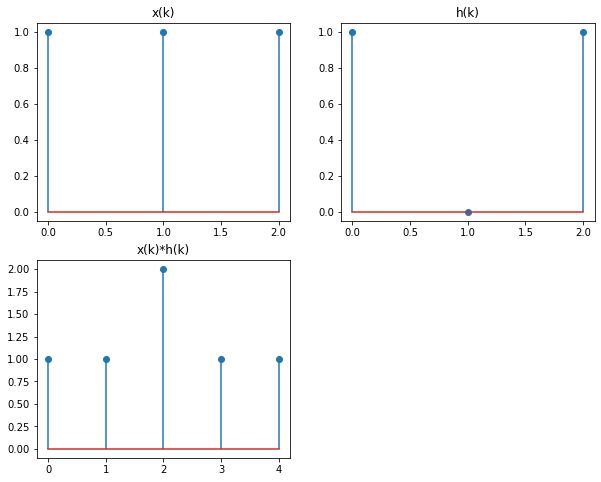

In [73]:
calc_conv([1, 1, 1], [0, 1, 2], [1, 0, 1], [0, 1, 2])

**Exercício.**